# 6. Análise de Sobrevivência para 3.º Golo do Jogo $t_0=0$

In [8]:
# directoria de trabalho
setwd("");
# chamar pacotes survival, DBI (para ligar base-de-dados), ggplot2 (graficos)
library(survival);
library(DBI);
library(ggplot2);
library(plyr);
library(IRdisplay);

conectar à base de dados

In [3]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");

recolher dados

In [4]:
goal3 <- dbGetQuery(foot, 'select id, tempo, cens, caso as equip from goal_3');
goal3_home <- dbGetQuery(foot, 'select id, 
	   tempo,
	   case when caso=2 and cens=0 then 0
	        when caso=1 and cens=0 then 0
			when caso=2 and cens=1 then 0
			when caso=1 and cens=1 then 1
	   end cens,
       liga
from goal_3');
goal3_away <- dbGetQuery(foot, 'select id, 
	   tempo,
	   case when caso=2 and cens=0 then 0
	        when caso=2 and cens=1 then 1
			when caso=1 and cens=1 then 0
			when caso=1 and cens=0 then 0
	   end cens,
       liga
from goal_3');
dbDisconnect(foot);
rm(foot);

preparar pallete de cores

In [5]:
color_pallete_function <- colorRampPalette(
  colors = c("black","red","green3","blue" ,"cyan","orange"),
  space = "Lab");
num_colors=6;
colors <- color_pallete_function(num_colors);

### 6.1.) EKM - Evento: 3.º golo do jogo => &nbsp; $  t_0=0$
obter tempos, censura (censurado/observado), liga e equipa para descrição do evento

In [6]:
temp <- goal3$tempo;
cens <- goal3$cens;
equip <- factor(goal3$equip);

ajustar o Estimador de Kaplan-Meier aos dados

In [7]:
ekm<-survfit(Surv(temp, cens) ~ equip);
quantile(ekm)$quantile;

25 50 75
equip=1 55 76 NA
equip=2 59 82 NA

aplicar o Teste de log-rank

In [8]:
survdiff(Surv(temp, cens) ~ equip,rho=0);

Call:
survdiff(formula = Surv(temp, cens) ~ equip, rho = 0)

           N Observed Expected (O-E)^2/E (O-E)^2/V
equip=1 1997     1418     1294      12.0      26.1
equip=2 1637     1026     1150      13.5      26.1

 Chisq= 26.1  on 1 degrees of freedom, p= 3e-07 

desenhar gráfico e respectiva legenda

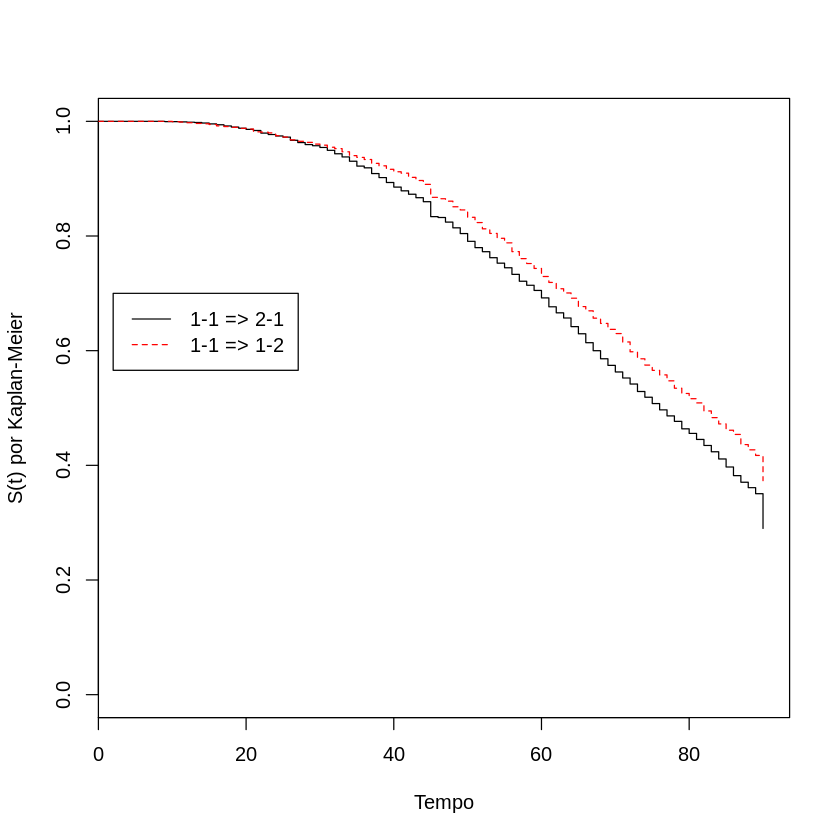

In [9]:
plot(ekm, lty=c(1,2), xlab="Tempo", ylab="S(t) por Kaplan-Meier", col=colors);
legend(2,0.70,lty=c(1,2),c("1-1 => 2-1","1-1 => 1-2"),col=colors);

### 6.2.) EKM - Evento: 3.º golo do jogo marcado pela equipa de casa (“third goal of the game is home)”
obter tempos e descrição do evento (censurado/observado)

In [10]:
temp <- goal3_home$tempo;
cens <- goal3_home$cens;
ligas <- factor(goal3_home$liga);
# reatribuir valores para liga
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));

ajustar o Estimador de Kaplan-Meier aos dados

In [11]:
ekm<-survfit(Surv(temp, cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 75 NA NA
liga=2 68 NA NA
liga=3 66 90 NA
liga=4 65 NA NA
liga=5 70 NA NA
liga=6 69 NA NA

aplicar o Teste de log-rank

In [12]:
survdiff(Surv(temp, cens) ~ liga,rho=0);

Call:
survdiff(formula = Surv(temp, cens) ~ liga, rho = 0)

         N Observed Expected (O-E)^2/E (O-E)^2/V
liga=1 477      167      196   4.24548     5.005
liga=2 635      257      245   0.56056     0.689
liga=3 567      245      209   6.11827     7.290
liga=4 640      257      238   1.58391     1.933
liga=5 623      217      257   6.11572     7.593
liga=6 692      275      273   0.00875     0.011

 Chisq= 18.9  on 5 degrees of freedom, p= 0.002 

desenhar gráfico e respectiva legenda

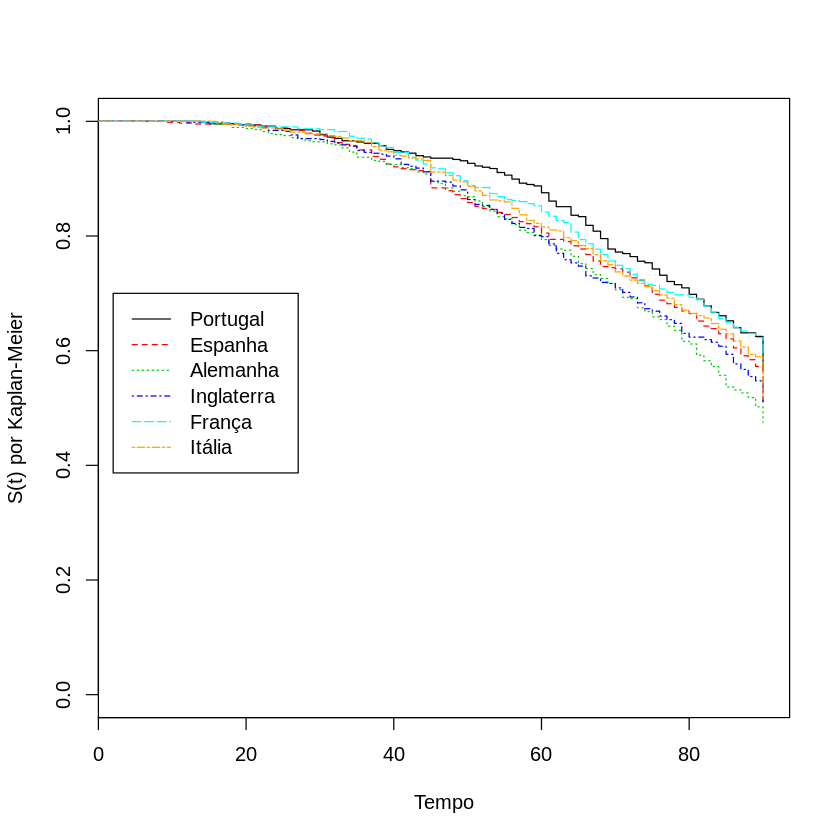

In [13]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", ylab="S(t) por Kaplan-Meier", col=colors);
legend(2,0.70,lty=c(1,2,3,4,5,6),c("Portugal","Espanha","Alemanha","Inglaterra","França","Itália"),col=colors);

### 6.3.) EKM - Evento: 3.º golo do jogo marcado pela equipa de fora (“third goal of the game is away”)
obter tempos e descrição do evento (censurado/observado)

In [14]:
temp <- goal3_away$tempo;
cens <- goal3_away$cens;
ligas <- factor(goal3_away$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));

ajustar o Estimador de Kaplan-Meier aos dados

In [15]:
ekm<-survfit(Surv(temp,cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 79 NA NA
liga=2 77 NA NA
liga=3 78 NA NA
liga=4 74 NA NA
liga=5 81 NA NA
liga=6 81 NA NA

aplicar o Teste de log-rank

In [16]:
survdiff(Surv(temp,cens) ~ liga,rho=0);

Call:
survdiff(formula = Surv(temp, cens) ~ liga, rho = 0)

         N Observed Expected (O-E)^2/E (O-E)^2/V
liga=1 477      139      142    0.0561    0.0658
liga=2 635      179      177    0.0134    0.0164
liga=3 567      159      151    0.3856    0.4570
liga=4 640      199      172    4.2826    5.1977
liga=5 623      157      186    4.4062    5.4385
liga=6 692      193      198    0.1212    0.1517

 Chisq= 9.4  on 5 degrees of freedom, p= 0.1 

desenhar gráfico e respectiva legenda

In [17]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", ylab="S(t) por Kaplan-Meier", col=colors);
legend(2,0.70,lty=c(1,2,3,4,5,6),c("Portugal","Espanha","Alemanha","Inglaterra","França","Itália"),col=colors);

### 6.4.) Modelo de Cox - 3.º Golo => $t_0=0$
resíduos de Schoenfeld

In [18]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql = 'select id, 
	   tempo,
	   cens,
       liga, 
       odds
        from goal_3';
goal3 <- dbGetQuery(foot, sql);
temp <- goal3$tempo;
cens <- goal3$cens;
ligas <- factor(goal3$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3", "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4", "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
odds <- as.numeric(goal3$odds);
fit <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
summary(fit);
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 3634, number of events= 2444 

           coef exp(coef)  se(coef)      z Pr(>|z|)   
liga2  0.128121  1.136691  0.074592  1.718  0.08587 . 
liga3  0.208323  1.231610  0.075914  2.744  0.00607 **
liga4  0.203438  1.225609  0.073966  2.750  0.00595 **
liga5 -0.074295  0.928397  0.077276 -0.961  0.33633   
liga6  0.087520  1.091464  0.073626  1.189  0.23455   
odds  -0.008871  0.991168  0.009765 -0.908  0.36365   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.1367     0.8797    0.9821     1.316
liga3    1.2316     0.8119    1.0613     1.429
liga4    1.2256     0.8159    1.0602     1.417
liga5    0.9284     1.0771    0.7979     1.080
liga6    1.0915     0.9162    0.9448     1.261
odds     0.9912     1.0089    0.9724     1.010

Concordance= 0.529  (se = 0.006 )
Rsquare= 0.007   (max possible= 1 )
Likelihood ratio test= 25.6  on 6 df

25   50 75
liga=1 61.0 82 NA
liga=2 55.0 78 NA
liga=3 54.0 76 NA
liga=4 54.5 74 NA
liga=5 60.0 82 NA
liga=6 57.0 80 NA

In [19]:
rsch <- resid(fit, type="scaledsch")
summary(rsch)

       V1                V2                 V3                 V4          
 Min.   :-7.9804   Min.   :-8.05561   Min.   :-8.00512   Min.   :-8.36257  
 1st Qu.: 0.0803   1st Qu.: 0.06079   1st Qu.: 0.09405   1st Qu.:-0.24172  
 Median : 0.1214   Median : 0.17199   Median : 0.18372   Median :-0.14818  
 Mean   : 0.1281   Mean   : 0.20832   Mean   : 0.20344   Mean   :-0.07429  
 3rd Qu.: 0.1894   3rd Qu.: 0.36624   3rd Qu.: 0.35078   3rd Qu.: 0.07375  
 Max.   : 6.5552   Max.   : 7.63375   Max.   : 6.13226   Max.   : 8.37223  
       V5                 V6           
 Min.   :-8.10761   Min.   :-0.470156  
 1st Qu.:-0.02920   1st Qu.:-0.256197  
 Median : 0.04718   Median :-0.145034  
 Mean   : 0.08752   Mean   :-0.008871  
 3rd Qu.: 0.29945   3rd Qu.: 0.029835  
 Max.   : 6.25812   Max.   : 5.376006  

In [20]:
cox.zph(fit, transform="identity")
par(mfrow=c(3,2))
plot(cox.zph(fit))

            rho  chisq      p
liga2  -0.02628 1.6872 0.1940
liga3  -0.01920 0.8985 0.3432
liga4  -0.01548 0.5846 0.4445
liga5  -0.03352 2.7476 0.0974
liga6  -0.01371 0.4583 0.4984
odds    0.00282 0.0194 0.8893
GLOBAL       NA 3.3924 0.7582

estamos a analisar 2 tipos de eventos:

evento 1) o jogo está empatado e a equipa de casa marca golo (1-1 => 2-1)

evento 2) o jogo está empatado e a equipa de fora marca golo (1-1 => 1-2)


consideram-se os eventos e faz-se a comparação das funções de sobrevivência...

considerar as variáveis:
<strong>
<ol>
    <li>ligas</li>
    <li>odds</li>
</ol>
</strong>


NB: variável que se pode analisar: equipa que marcou golo1?

### 6.4.1) Modelo de Cox - 3.º Golo - equipa "casa" (de 1-1 para 2-1) => $t_0=0$

In [9]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql = 'select id, 
	   tempo,
	   case when caso=2 and cens=0 then 0
	        when caso=1 and cens=0 then 0
			when caso=2 and cens=1 then 0
			when caso=1 and cens=1 then 1
	   end cens,
       liga, odds
        from goal_3'
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$tempo;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
odds <- as.numeric(sec_goal$odds);
fit <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
summary(fit);
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 3634, number of events= 1418 

           coef exp(coef)  se(coef)      z Pr(>|z|)   
liga2  0.205569  1.228224  0.099411  2.068  0.03865 * 
liga3  0.315853  1.371429  0.100526  3.142  0.00168 **
liga4  0.236892  1.267304  0.099490  2.381  0.01726 * 
liga5 -0.010396  0.989658  0.103204 -0.101  0.91977   
liga6  0.163502  1.177628  0.098257  1.664  0.09611 . 
odds  -0.003219  0.996787  0.012541 -0.257  0.79745   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.2282     0.8142    1.0108     1.492
liga3    1.3714     0.7292    1.1262     1.670
liga4    1.2673     0.7891    1.0428     1.540
liga5    0.9897     1.0104    0.8084     1.212
liga6    1.1776     0.8492    0.9713     1.428
odds     0.9968     1.0032    0.9726     1.022

Concordance= 0.535  (se = 0.008 )
Rsquare= 0.005   (max possible= 0.998 )
Likelihood ratio test= 18.91  on

25 50 75
liga=1 75 NA NA
liga=2 68 NA NA
liga=3 66 90 NA
liga=4 65 NA NA
liga=5 70 NA NA
liga=6 69 NA NA

In [33]:
rsch <- resid(fit, type="scaledsch")
summary(rsch)

       V1                V2                V3                V4          
 Min.   :-8.4007   Min.   :-8.4564   Min.   :-8.4825   Min.   :-8.80623  
 1st Qu.: 0.1621   1st Qu.: 0.1691   1st Qu.: 0.1229   1st Qu.:-0.18328  
 Median : 0.2005   Median : 0.2762   Median : 0.2130   Median :-0.08879  
 Mean   : 0.2056   Mean   : 0.3159   Mean   : 0.2369   Mean   :-0.01040  
 3rd Qu.: 0.2638   3rd Qu.: 0.5218   3rd Qu.: 0.3906   3rd Qu.: 0.13529  
 Max.   : 6.4507   Max.   : 7.0718   Max.   : 6.2115   Max.   : 8.45423  
       V5                 V6           
 Min.   :-8.54221   Min.   :-0.448812  
 1st Qu.: 0.04075   1st Qu.:-0.247843  
 Median : 0.11914   Median :-0.144101  
 Mean   : 0.16350   Mean   :-0.003219  
 3rd Qu.: 0.42206   3rd Qu.: 0.023262  
 Max.   : 6.28706   Max.   : 5.137965  

            rho  chisq      p
liga2  -0.03369 1.6093 0.2046
liga3  -0.03715 1.9453 0.1631
liga4  -0.04884 3.3732 0.0663
liga5  -0.04743 3.1936 0.0739
liga6  -0.01779 0.4472 0.5037
odds    0.00408 0.0252 0.8738
GLOBAL       NA 5.2950 0.5066

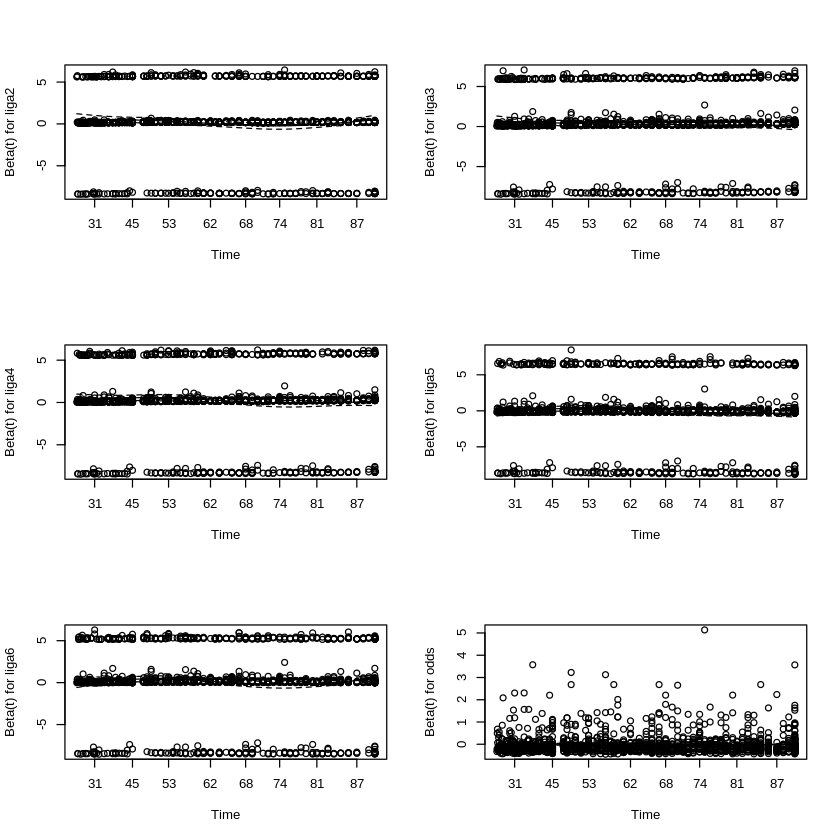

In [23]:
cox.zph(fit, transform="identity")
par(mfrow=c(3, 2))
plot(cox.zph(fit))

### 6.4.1.1) Processo de Seleção de Variáveis do Modelo para 3.º Golo Casa (de 1-1 para 2-1)

##### retirar liga=5 e calcular TRV

In [10]:
ligas <- revalue(liga, c("5"="1"));
fit1 <- coxph(Surv(temp, cens) ~ ligas + odds, method="breslow");
TRV <- 2*(fit$loglik[2]-fit1$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.01014154

[1] 0.3781149

Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

In [11]:
summary(fit1)$coefficients;

coef         exp(coef) se(coef)   z          Pr(>|z|)    
ligas2  0.211439724 1.2354555 0.08063235  2.6222691 8.734644e-03
ligas3  0.321750970 1.3795412 0.08180768  3.9330165 8.388647e-05
ligas4  0.242777431 1.2747849 0.08061743  3.0114756 2.599813e-03
ligas6  0.169399255 1.1845930 0.07900922  2.1440442 3.202934e-02
odds   -0.003128746 0.9968761 0.01250971 -0.2501054 8.025059e-01

retirar odds

In [12]:
fit2 <- coxph(Surv(temp, cens) ~ ligas, method="breslow");
TRV <- 2*(fit1$loglik[2]-fit2$loglik[2])
pvalue <- pchisq(0.95, 1)
TRV
pvalue

[1] 0.06309369

[1] 0.6702807

Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

In [6]:
summary(fit2)$coefficients;

coef      exp(coef) se(coef)   z        Pr(>|z|)    
ligas2 0.2108099 1.234678  0.08059629 2.615628 8.906357e-03
ligas3 0.3221427 1.380082  0.08179274 3.938524 8.198439e-05
ligas4 0.2427539 1.274755  0.08061727 3.011190 2.602259e-03
ligas6 0.1697270 1.184981  0.07899885 2.148475 3.167607e-02

retirar ligas=6;  (ligas - (5 e 6))

In [7]:
ligas <- factor(sec_goal$liga);
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", "26"="1", "27"="1", "28"="1", "29"="1",
                         "30"="1"));

In [28]:
fit3 <- coxph(Surv(temp, cens) ~ liga, method="breslow");
TRV <- 2*(fit2$loglik[2]-fit3$loglik[2])
pvalue <- pchisq(0.95, 1)
TRV
pvalue

[1] 4.567795

[1] 0.3781149

##### Como TRV > p-value então existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (reject null)

PARAR PROCESSO DE SELEÇÃO DE VARIÁVEIS => usar modelo inicial mas retirar ligas=5 e odds

In [29]:
ligas <- factor(sec_goal$liga);
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
fit <- coxph(Surv(temp, cens) ~ liga, method="breslow");

In [31]:
summary(fit);

Call:
coxph(formula = Surv(temp, cens) ~ liga, method = "breslow")

  n= 3634, number of events= 1418 

         coef exp(coef) se(coef)     z Pr(>|z|)    
liga2 0.21081   1.23468  0.08060 2.616  0.00891 ** 
liga3 0.32214   1.38008  0.08179 3.939  8.2e-05 ***
liga4 0.24275   1.27475  0.08062 3.011  0.00260 ** 
liga6 0.16973   1.18498  0.07900 2.148  0.03168 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2     1.235     0.8099     1.054     1.446
liga3     1.380     0.7246     1.176     1.620
liga4     1.275     0.7845     1.088     1.493
liga6     1.185     0.8439     1.015     1.383

Concordance= 0.534  (se = 0.008 )
Rsquare= 0.005   (max possible= 0.998 )
Likelihood ratio test= 18.84  on 4 df,   p=8e-04
Wald test            = 18.54  on 4 df,   p=0.001
Score (logrank) test = 18.64  on 4 df,   p=9e-04


In [31]:
betas_11_21 <- fit$coefficients;
ht_11_21 <- basehaz(fit, centered=F);
tempo_1 <- ht_11_21$time
H0_11_21 <- ht_11_21$hazard
S0_11_21 <- exp(-H0_11_21)
S1_11_21 <- S0_11_21^exp(betas_11_21[1])
S2_11_21 <- S0_11_21^exp(betas_11_21[3])
S5_11_21 <- S0_11_21^exp(betas_11_21[4])
plot(tempo_1, S1_11_21, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo_1), c(1, S2_11_21), lty=2)
lines(c(0, tempo_1), c(2, S5_11_21), lty=3)
legend(10, 0.7, lty=c(1, 2, 3), c("Espanha", "Inglaterra", "Italia"))

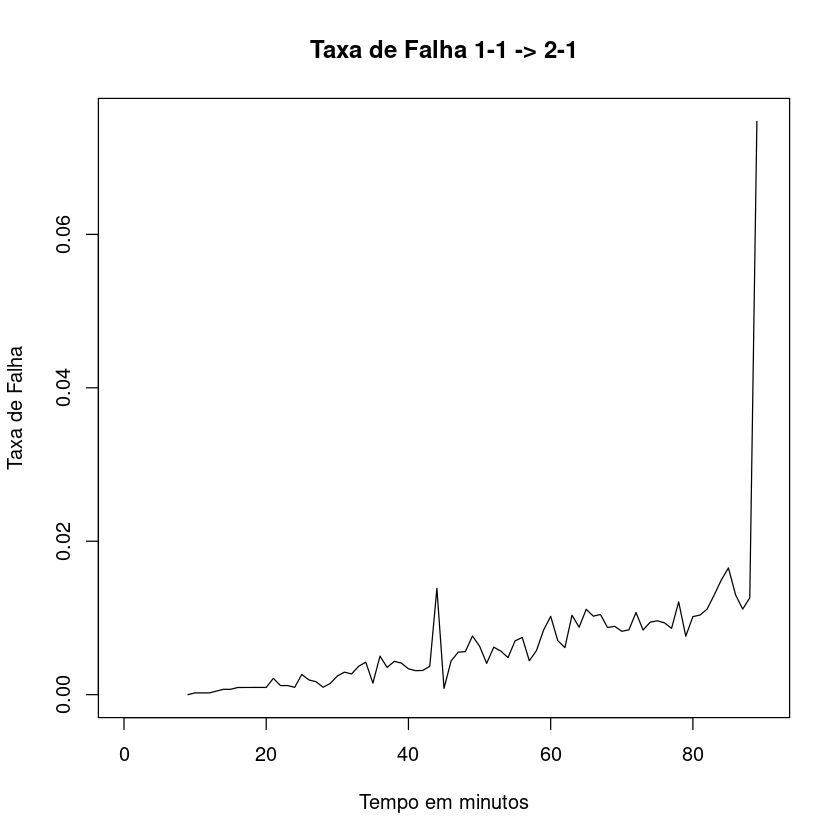

In [32]:
Ht<-basehaz(fit,centered=F)
l1=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_1[1:length(tempo_1)-1],l1,lty=1,type="l",
     xlim=range(c(0,max(tempo_1))),xlab="Tempo em minutos",ylab="Taxa de Falha", 
     main="Taxa de Falha 1-1 -> 2-1");

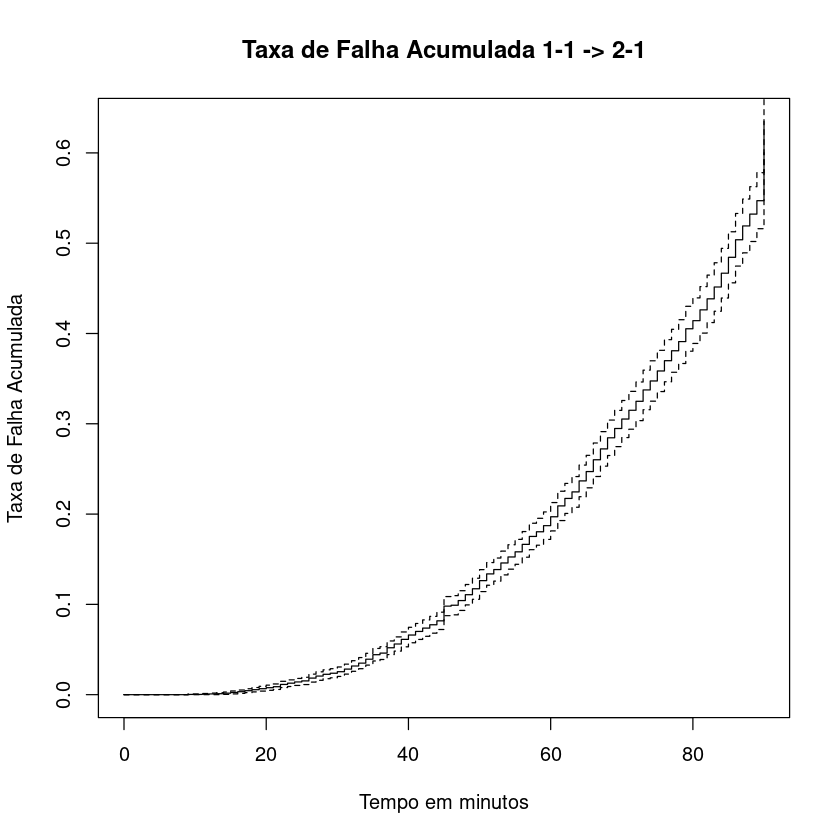

In [33]:
surv2 <- survfit(fit);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", ylab="Taxa de Falha Acumulada", 
     main="Taxa de Falha Acumulada 1-1 -> 2-1");

### 6.4.2) Modelo de Riscos Porporcionais de Cox - 3.º Golo Fora  (de 1-1 para 1-2)

In [13]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, 
	   tempo,
	   case when caso=2 and cens=0 then 0
	        when caso=2 and cens=1 then 1
			when caso=1 and cens=1 then 0
			when caso=1 and cens=0 then 0
	   end cens,
       liga, odds
from goal_3';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$tempo;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
odds <- as.numeric(sec_goal$odds)
fit <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
summary(fit);
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 3634, number of events= 1026 

          coef exp(coef) se(coef)      z Pr(>|z|)
liga2  0.02624   1.02659  0.11308  0.232    0.816
liga3  0.06208   1.06405  0.11631  0.534    0.593
liga4  0.16173   1.17554  0.11063  1.462    0.144
liga5 -0.15680   0.85488  0.11674 -1.343    0.179
liga6 -0.01193   0.98814  0.11140 -0.107    0.915
odds  -0.01708   0.98306  0.01555 -1.099    0.272

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.0266     0.9741    0.8225     1.281
liga3    1.0641     0.9398    0.8472     1.336
liga4    1.1755     0.8507    0.9464     1.460
liga5    0.8549     1.1698    0.6800     1.075
liga6    0.9881     1.0120    0.7943     1.229
odds     0.9831     1.0172    0.9536     1.013

Concordance= 0.521  (se = 0.009 )
Rsquare= 0.003   (max possible= 0.987 )
Likelihood ratio test= 10.57  on 6 df,   p=0.1
Wald test            = 10.45  on 6 df,   p=0.1
Score (logrank) test = 10.49  on 6 df,  

25 50 75
liga=1 79 NA NA
liga=2 77 NA NA
liga=3 78 NA NA
liga=4 74 NA NA
liga=5 81 NA NA
liga=6 81 NA NA

In [18]:
rsch <- resid(fit, type="scaledsch")
summary(rsch)

       V1                 V2                 V3                 V4           
 Min.   :-7.47331   Min.   :-7.56115   Min.   :-7.40947   Min.   :-7.829316  
 1st Qu.:-0.02670   1st Qu.:-0.08650   1st Qu.: 0.05962   1st Qu.:-0.312215  
 Median : 0.01739   Median : 0.02913   Median : 0.15266   Median :-0.222896  
 Mean   : 0.02625   Mean   : 0.06208   Mean   : 0.16173   Mean   :-0.156795  
 3rd Qu.: 0.09879   3rd Qu.: 0.19060   3rd Qu.: 0.30243   3rd Qu.:-0.005384  
 Max.   : 6.34663   Max.   : 7.87906   Max.   : 5.85453   Max.   : 7.327296  
       V5                 V6          
 Min.   :-7.56630   Min.   :-0.49396  
 1st Qu.:-0.11928   1st Qu.:-0.26966  
 Median :-0.04689   Median :-0.14936  
 Mean   :-0.01193   Mean   :-0.01708  
 3rd Qu.: 0.16512   3rd Qu.: 0.04645  
 Max.   : 6.10841   Max.   : 3.55191  

In [7]:
cox.zph(fit, transform="identity")
par(mfrow=c(2,3))
plot(cox.zph(fit))

             rho    chisq     p
liga2  -0.017826 0.325582 0.568
liga3   0.005458 0.030644 0.861
liga4   0.029676 0.902126 0.342
liga5  -0.015207 0.237163 0.626
liga6  -0.010289 0.108350 0.742
odds    0.000721 0.000471 0.983
GLOBAL        NA 3.762993 0.709

### 6.4.2.1) Processo de Seleção de Variáveis Modelo de - 3.º Golo Casa (de 1-1 para 1-2)

##### retirar liga=6 e calcular TRV

In [14]:
ligas <- revalue(liga, c("6"="1"));
fit1 <- coxph(Surv(temp, cens) ~ ligas + odds, method="breslow");
TRV <- 2*(fit$loglik[2]-fit1$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.01145447

[1] 0.3781149

##### Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

In [15]:
summary(fit1)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)  
ligas2  0.03319071 1.0337477 0.09273413  0.3579125 0.72040876
ligas3  0.06904963 1.0714894 0.09650704  0.7154881 0.47430752
ligas4  0.16868425 1.1837463 0.08967092  1.8811477 0.05995184
ligas5 -0.14981941 0.8608634 0.09697095 -1.5449927 0.12234803
odds   -0.01699454 0.9831491 0.01552651 -1.0945502 0.27371372

retirar ligas=2

In [16]:
liga <- revalue(ligas, c("2"="1"));
fit2 <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit1$loglik[2]-fit2$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.1276728

[1] 0.3781149

##### Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

In [17]:
summary(fit2)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)  
liga3  0.05755690 1.0592455 0.09088456  0.6332968 0.52653984
liga4  0.15718452 1.1702115 0.08358223  1.8805974 0.06002671
liga5 -0.16130515 0.8510323 0.09138417 -1.7651322 0.07754154
odds  -0.01694564 0.9831971 0.01555160 -1.0896395 0.27587196

##### retirar ligas=3 e calcular TRV

In [18]:
ligas <- revalue(liga, c("3"="1"));
fit3 <- coxph(Surv(temp, cens) ~ ligas + odds, method="breslow");
TRV <- 2*(fit2$loglik[2]-fit3$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.3970281

[1] 0.3781149

In [19]:
summary(fit3)[7]$coefficients;

coef        exp(coef) se(coef)   z         Pr(>|z|)  
ligas4  0.14380091 1.1546542 0.08074304  1.780970 0.07491741
ligas5 -0.17474246 0.8396732 0.08877372 -1.968403 0.04902167
odds   -0.01728722 0.9828613 0.01553447 -1.112830 0.26578165

retirar odds

In [21]:
fit4 <- coxph(Surv(temp, cens) ~ ligas, method="breslow");
TRV <- 2*(fit3$loglik[2]-fit4$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 1.296641

[1] 0.3781149

### Como TRV > p-value então existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (reject null)

PARAR PROCESSO DE SELEÇÃO DE VARIÁVEIS => usar modelo inicial mas retirando ligas=6 e ligas=2   => (fit2)

In [24]:
summary(fit2)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)  
liga3  0.05755690 1.0592455 0.09088456  0.6332968 0.52653984
liga4  0.15718452 1.1702115 0.08358223  1.8805974 0.06002671
liga5 -0.16130515 0.8510323 0.09138417 -1.7651322 0.07754154
odds  -0.01694564 0.9831971 0.01555160 -1.0896395 0.27587196

In [25]:
betas_11_12 <- fit2$coefficients
ht_11_12 <- basehaz(fit2, centered=F);
tempo_2 <- ht_11_12$time
H0_11_12 <- ht_11_12$hazard
S0_11_12 <- exp(-H0_11_12)
S1_11_12 <- S0_11_12^exp(betas_11_12[3])
S2_11_12 <- S0_11_12^exp(betas_11_12[3]*2)
S5_11_12 <- S0_11_12^exp(betas_11_12[3]*5)
plot(tempo_2, S1_11_12, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)", ylim=c(0.6, 1),
    main="Taxa de Falha Acumulada 1-1 => 1-2")
lines(c(0, tempo_2), c(1, S2_11_12), lty=2)
lines(c(0, tempo_2), c(2, S5_11_12), lty=3)
legend(10, 0.7, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"))

In [28]:
Ht<-basehaz(fit2,centered=F)
l2=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_2[1:length(tempo_2)-1],l2,lty=1,type="l",
     xlim=range(c(0,max(tempo_2))),xlab="Tempo em minutos",ylab="Taxa de Falha", 
     main="Taxa de Falha 1-1 -> 1-2");

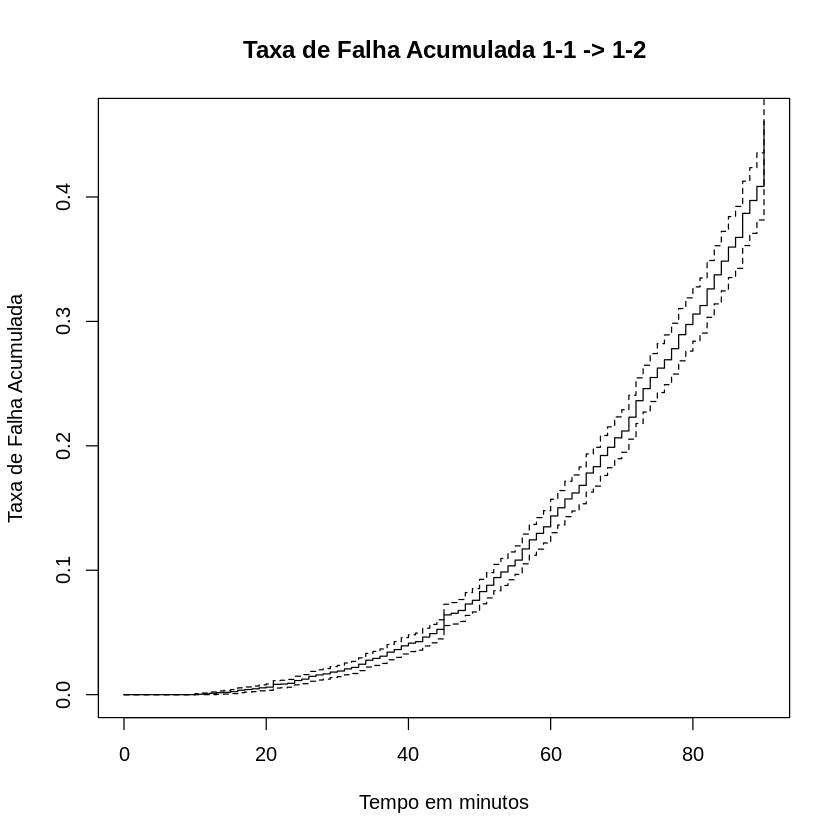

In [27]:
surv2 <- survfit(fit2);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", ylab="Taxa de Falha Acumulada", 
     main="Taxa de Falha Acumulada 1-1 -> 1-2");

# 6.5) Comparação de Taxas de Falha (1-1=>2-1 vs. 1-1=>1-2) $t_0=0$

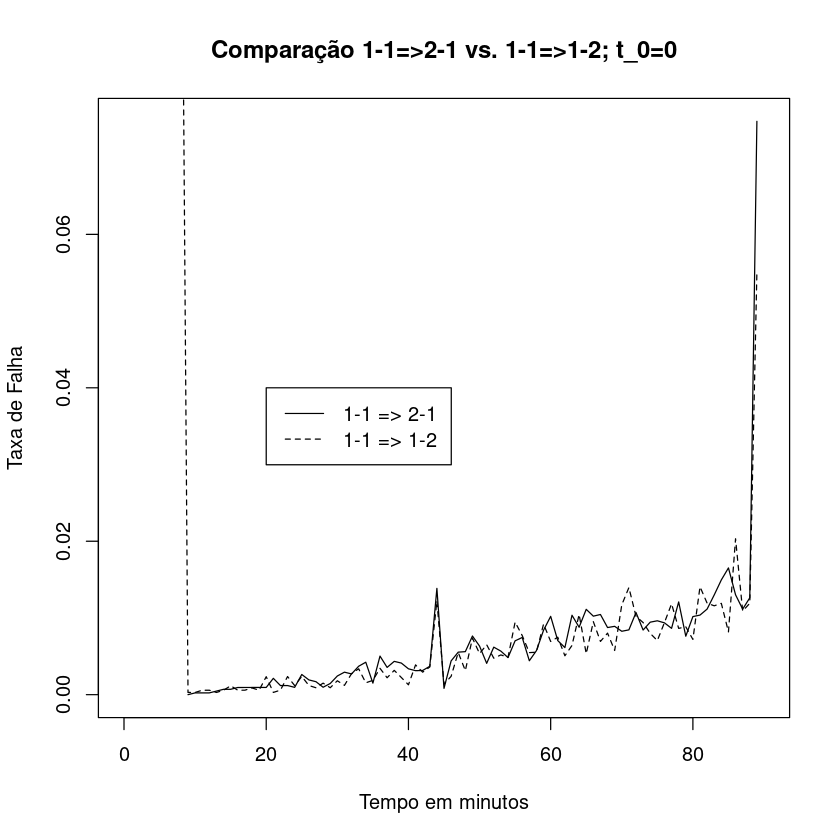

In [46]:
plot(tempo_1[1:length(tempo_1)-1],l1,lty=1,type="l",
     xlim=range(c(0,max(tempo_1))),xlab="Tempo em minutos",ylab="Taxa de Falha", 
     main="Comparação 1-1=>2-1 vs. 1-1=>1-2; t_0=0");
lines(c(1, tempo_2[1:length(tempo_2)-1]), c(1, l2), lty=2)
legend(20, 0.04, lty=c(1, 2), c("1-1 => 2-1", "1-1 => 1-2"));